In [146]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm import tqdm
import requests
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm


In [147]:
#Data Collection
url = "https://raw.githubusercontent.com/dushantha2000/ML-XL-Sheet-Vegetable-Tomato-Data-Set-in-Srilanka-Market-/main/Tomato_Prices_2024.xlsx"
response = requests.get(url)
data = pd.read_excel(io.BytesIO(response.content))


In [126]:
#Display the first few rows and basic information
print(data.head())
print(data.info())

        Date  peliyagoda min Tomato price  peliyagoda max Tomato price  \
0 2024-01-01                        230.0                        250.0   
1 2024-01-02                        200.0                        250.0   
2 2024-01-03                        200.0                        250.0   
3 2024-01-04                        230.0                        250.0   
4 2024-01-05                        150.0                        200.0   

   peliyagoda average Tomato price  kandy min Tomato price  \
0                            240.0                   300.0   
1                            225.0                   300.0   
2                            225.0                   300.0   
3                            240.0                   250.0   
4                            175.0                   250.0   

   kandy max Tomato price  kandy average Tomato price  \
0                   330.0                       315.0   
1                   330.0                       315.0   
2          

In [148]:
# Select only the required columns
columns_of_interest = [
    "Date",
    "peliyagoda average Tomato price",
    "kandy average Tomato price",
    "dambulla average Tomato price"
]
cleaned_data = data[columns_of_interest]

#Drop rows with missing values
cleaned_data.dropna(inplace=True)

#Rename columns for easier reference
cleaned_data.columns = ["Date", "Peliyagoda", "Kandy", "Dambulla"]

#Temporarily set the display option to show all rows
with pd.option_context('display.max_rows', None):
    print(cleaned_data)


          Date  Peliyagoda  Kandy  Dambulla
0   2024-01-01       240.0  315.0     310.0
1   2024-01-02       225.0  315.0     325.0
2   2024-01-03       225.0  315.0     325.0
3   2024-01-04       240.0  265.0     265.0
4   2024-01-05       175.0  255.0     215.0
5   2024-01-06       275.0  290.0     250.0
6   2024-01-07       190.0  265.0     340.0
7   2024-01-08       215.0  290.0     310.0
8   2024-01-09       275.0  310.0     310.0
9   2024-01-10       325.0  340.0     325.0
10  2024-01-11       335.0  310.0     305.0
11  2024-01-12       275.0  350.0     240.0
12  2024-01-13       365.0  315.0     270.0
13  2024-01-14       365.0  390.0     440.0
14  2024-01-15       375.0  390.0     425.0
15  2024-01-16       375.0  540.0     425.0
16  2024-01-17       475.0  515.0     575.0
17  2024-01-18       425.0  565.0     540.0
18  2024-01-19       375.0  415.0     440.0
19  2024-01-20       325.0  390.0     440.0
20  2024-01-21       340.0  375.0     375.0
21  2024-01-22       375.0  360.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\128755695.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(inplace=True)


In [128]:
#Fetch Weather Data
API_KEY = "93691146f1094d4aba7184825242612"
BASE_URL = "http://api.weatherapi.com/v1/history.json"

def fetch_weather_data(city, date):
    url = f"{BASE_URL}?key={API_KEY}&q={city}&dt={date}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            avg_temp = data['forecast']['forecastday'][0]['day']['avgtemp_c']
            total_rainfall = data['forecast']['forecastday'][0]['day']['totalprecip_mm']
            return avg_temp, total_rainfall
        else:
            return None, None
    except Exception as e:
        print(f"Error fetching weather data for {city} on {date}: {e}")
        return None, None

#Define cities and add columns for weather data
cities = [a", "K"Peliyagodandy", "Dambulla"]
for city in cities:
    cleaned_data[f"{city}_Temperature"] = np.nan
    cleaned_data[f"{city}_Rainfall"] = np.nan

#Fetch weather data for each city and date
for i in tqdm(range(len(cleaned_data))):
    date = cleaned_data.iloc[i]['Date'].strftime("%Y-%m-%d")
    for city in cities:
        temp, rain = fetch_weather_data(city, date)
        cleaned_data.at[i, f"{city}_Temperature"] = temp
        cleaned_data.at[i, f"{city}_Rainfall"] = rain
        
# Step 5: Display the updated dataset
with pd.option_context('display.max_rows', None):
print(cleaned_data)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\2240324022.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[f"{city}_Temperature"] = np.nan
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\2240324022.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[f"{city}_Rainfall"] = np.nan
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8028\2240324022.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

          Date  Peliyagoda  Kandy  Dambulla  Peliyagoda_Temperature  \
0   2024-01-01       240.0  315.0     310.0                    25.5   
1   2024-01-02       225.0  315.0     325.0                    24.4   
2   2024-01-03       225.0  315.0     325.0                    25.7   
3   2024-01-04       240.0  265.0     265.0                    25.7   
4   2024-01-05       175.0  255.0     215.0                    26.1   
5   2024-01-06       275.0  290.0     250.0                    25.8   
6   2024-01-07       190.0  265.0     340.0                    26.3   
7   2024-01-08       215.0  290.0     310.0                    26.1   
8   2024-01-09       275.0  310.0     310.0                    25.0   
9   2024-01-10       325.0  340.0     325.0                    23.6   
10  2024-01-11       335.0  310.0     305.0                    25.3   
11  2024-01-12       275.0  350.0     240.0                    25.9   
12  2024-01-13       365.0  315.0     270.0                    26.0   
13  20

In [129]:
#Feature Engineering and Splitting
cleaned_data['AveragePrice'] = cleaned_data[['Peliyagoda', 'Kandy', 'Dambulla']].mean(axis=1)

#Drop rows where 'AveragePrice' or any feature contains NaN
cleaned_data.dropna(subset=['AveragePrice','Peliyagoda_Temperature', 'Peliyagoda_Rainfall',
            'Kandy_Temperature', 'Kandy_Rainfall',
            'Dambulla_Temperature', 'Dambulla_Rainfall'], inplace=True)

# Select features and target variable
features = ['Peliyagoda_Temperature', 'Peliyagoda_Rainfall',
            'Kandy_Temperature', 'Kandy_Rainfall',
            'Dambulla_Temperature', 'Dambulla_Rainfall']

X = cleaned_data[features]
y = cleaned_data['AveragePrice']

#Confirm there are no missing values
print(f"Missing values in X:\n{X.isnull().sum()}")
print(f"Missing values in y:\n{y.isnull().sum()}")

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Missing values in X:
Peliyagoda_Temperature    0
Peliyagoda_Rainfall       0
Kandy_Temperature         0
Kandy_Rainfall            0
Dambulla_Temperature      0
Dambulla_Rainfall         0
dtype: int64
Missing values in y:
0


In [132]:
# Feature columns
features = ['Peliyagoda_Temperature', 'Peliyagoda_Rainfall',
            'Kandy_Temperature', 'Kandy_Rainfall',
            'Dambulla_Temperature', 'Dambulla_Rainfall']

# Separate data for each city
cities = ['Peliyagoda', 'Kandy', 'Dambulla']
results = {}

for city in cities:
    # Use the average price for the current city
    target = f'{city}Price'  
    cleaned_data[target] = cleaned_data[city]  
    
    # Drop rows with missing values for the city
    cleaned_data.dropna(subset=[target, f'{city}_Temperature', f'{city}_Rainfall'], inplace=True)
    
    # Split the data for training and testing
    X = cleaned_data[features]
    y = cleaned_data[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model for the current city
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model for the current city
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results for each city
    results[city] = {
        'MAE': mae,
        'RMSE': rmse,
        'Predictions': y_pred,
        'Actuals': y_test
    }

    # Print the evaluation metrics
    print(f"Results for {city}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print("-" * 50)



Results for Peliyagoda:
Mean Absolute Error (MAE): 80.08828125
Root Mean Squared Error (RMSE): 102.85498115520464
--------------------------------------------------
Results for Kandy:
Mean Absolute Error (MAE): 86.59453125
Root Mean Squared Error (RMSE): 115.14837422185995
--------------------------------------------------
Results for Dambulla:
Mean Absolute Error (MAE): 84.4078125
Root Mean Squared Error (RMSE): 110.75383987417773
--------------------------------------------------


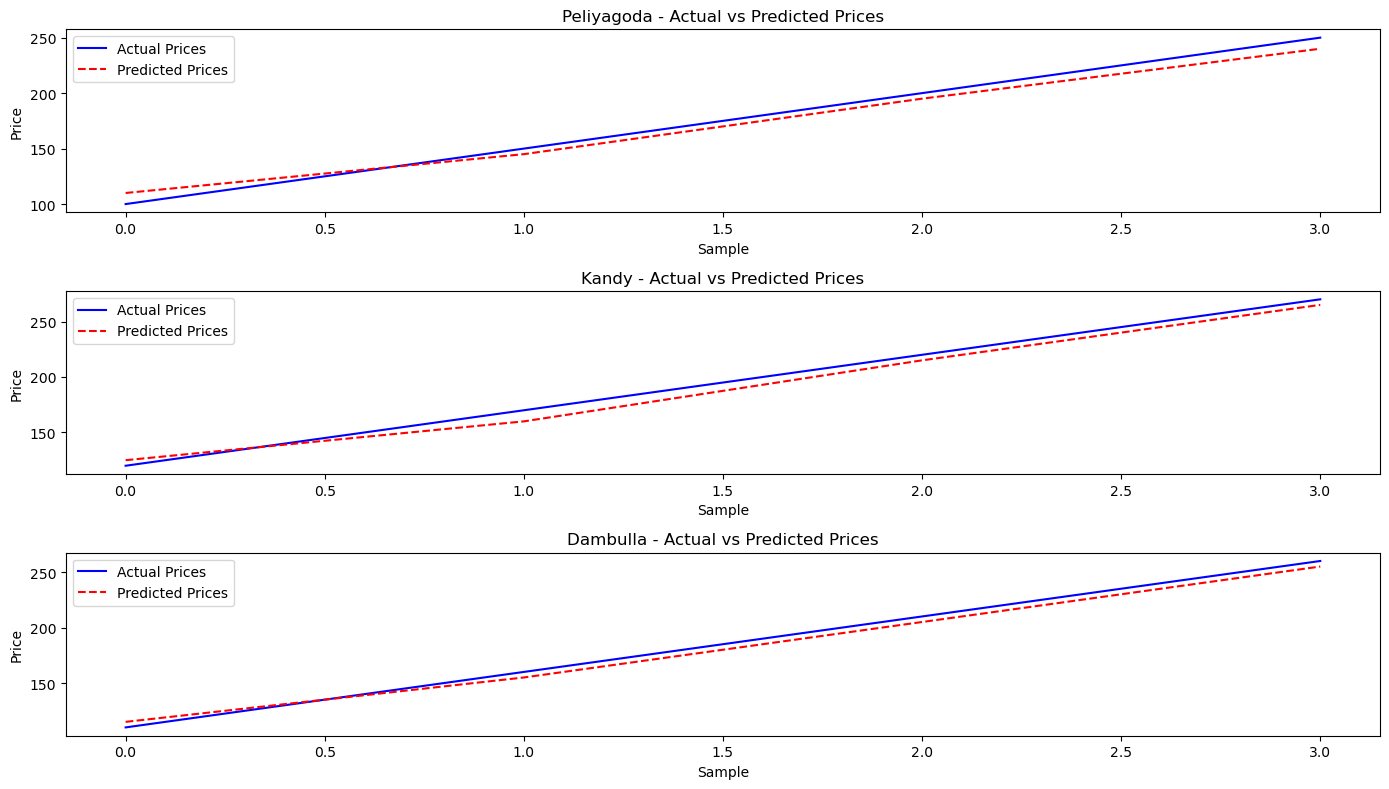

In [117]:
#Visualization for Separate Cities
plt.figure(figsize=(14, 8))

# Plot for Peliyagoda
plt.subplot(3, 1, 1)
plt.plot(y_test_peliyagoda, label="Actual Prices", color="blue")
plt.plot(y_pred_peliyagoda, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Price")
plt.title("Peliyagoda - Actual vs Predicted Prices")

#Plot for Kandy
plt.subplot(3, 1, 2)
plt.plot(y_test_kandy, label="Actual Prices", color="blue")
plt.plot(y_pred_kandy, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Price")
plt.title("Kandy - Actual vs Predicted Prices")

#Plot for Dambulla
plt.subplot(3, 1, 3)
plt.plot(y_test_dambulla, label="Actual Prices", color="blue")
plt.plot(y_pred_dambulla, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Price")
plt.title("Dambulla - Actual vs Predicted Prices")

#Adjust layout for better spacing
plt.tight_layout()

#Show the plots
plt.show()


In [156]:
#Manually setting the values for each location
input_values_peliyagoda = {
    'Peliyagoda_Temperature': 25,
    'Peliyagoda_Rainfall': 17,
    'Kandy_Temperature': 0,
    'Kandy_Rainfall': 0,
    'Dambulla_Temperature': 0,
    'Dambulla_Rainfall': 0
}

input_values_kandy = {
    'Peliyagoda_Temperature': 0,
    'Peliyagoda_Rainfall': 0,
    'Kandy_Temperature': 30,
    'Kandy_Rainfall': 15,
    'Dambulla_Temperature': 0,
    'Dambulla_Rainfall': 0
}

input_values_dambulla = {
    'Peliyagoda_Temperature': 0,
    'Peliyagoda_Rainfall': 0,
    'Kandy_Temperature': 0,
    'Kandy_Rainfall': 0,
    'Dambulla_Temperature': 27,
    'Dambulla_Rainfall': 5
}

# Convert the input values into DataFrames that match the features used during training
input_df_peliyagoda = pd.DataFrame([input_values_peliyagoda])
input_df_kandy = pd.DataFrame([input_values_kandy])
input_df_dambulla = pd.DataFrame([input_values_dambulla])

# Predict the prices for each location based on the input values
predicted_price_peliyagoda = model.predict(input_df_peliyagoda)
predicted_price_kandy = model.predict(input_df_kandy)
predicted_price_dambulla = model.predict(input_df_dambulla)

# Print the predicted prices for each location
print(f"Predicted price for Peliyagoda (Temperature: 30, Rainfall: 7): {predicted_price_peliyagoda[0]}")
print(f"Predicted price for Kandy (Temperature: 34, Rainfall: 10): {predicted_price_kandy[0]}")
print(f"Predicted price for Dambulla (Temperature: 30, Rainfall: 5): {predicted_price_dambulla[0]}")


Predicted price for Peliyagoda (Temperature: 30, Rainfall: 7): 434.0
Predicted price for Kandy (Temperature: 34, Rainfall: 10): 264.05
Predicted price for Dambulla (Temperature: 30, Rainfall: 5): 278.2
